In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Airline = pd.read_csv("C:/Users/Akshay/OneDrive/Desktop/Airlines.csv")

In [4]:
Airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
Airline.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [6]:
Airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
Airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
Airline.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [9]:
Airline.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [10]:
Airline.drop('ID#' , axis = 1 , inplace = True)

In [11]:
Airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


# data visualization

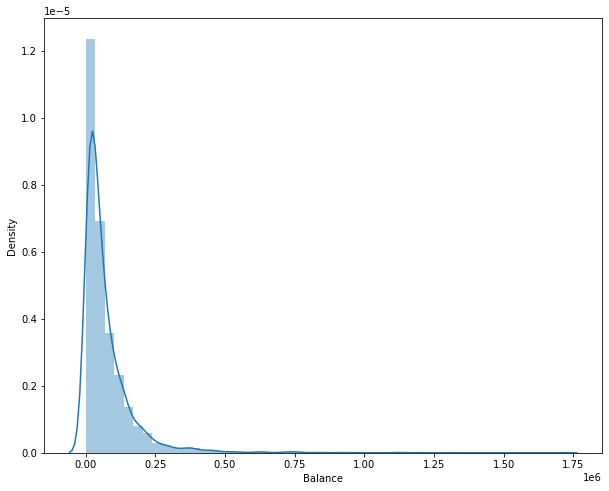

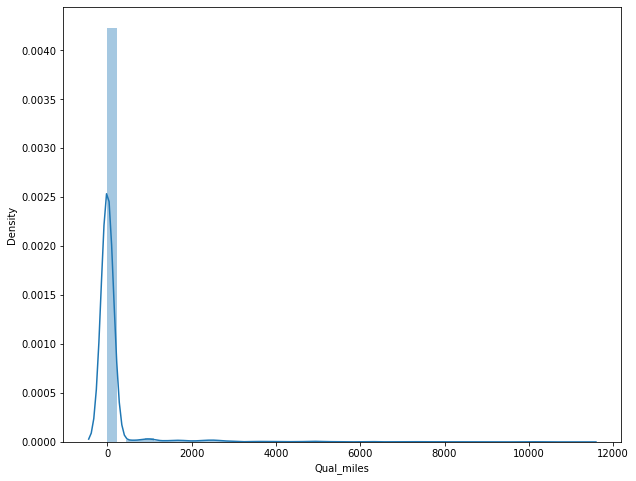

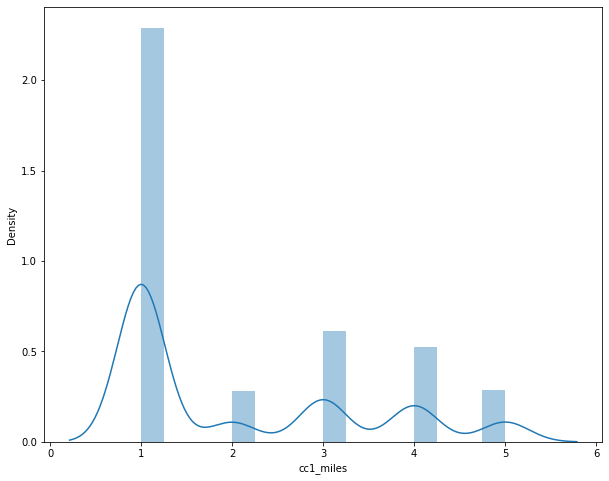

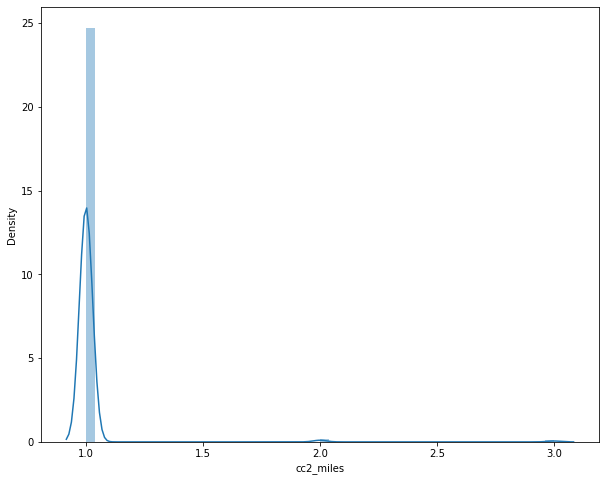

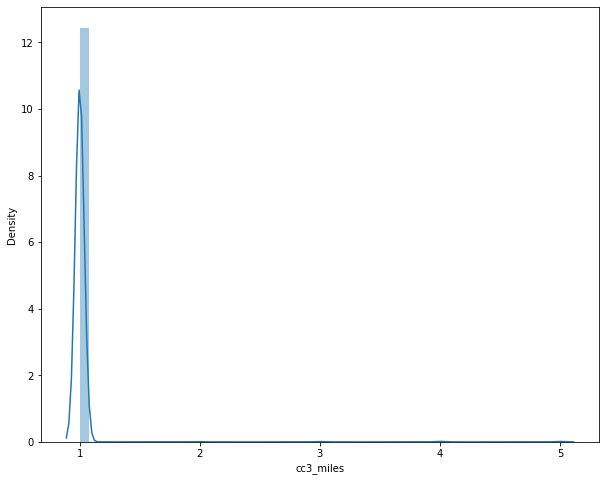

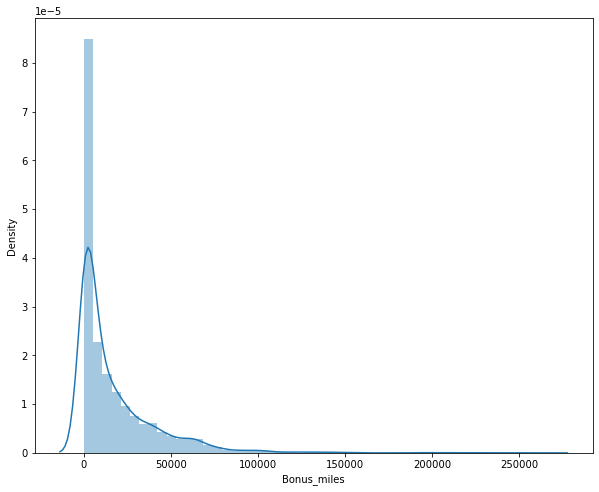

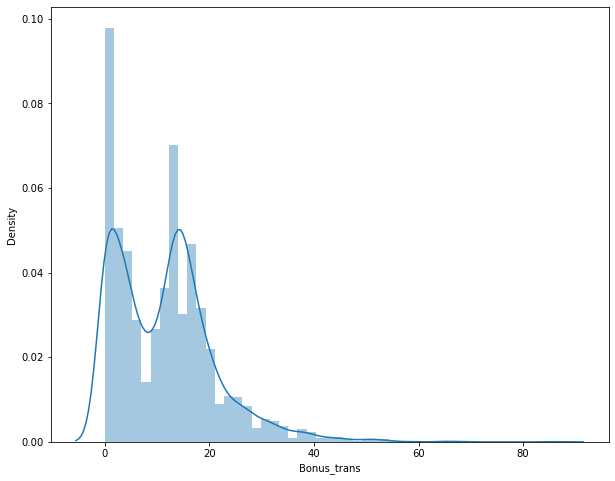

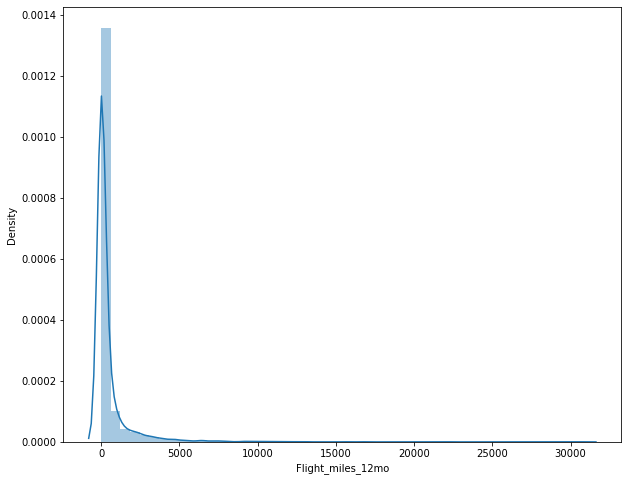

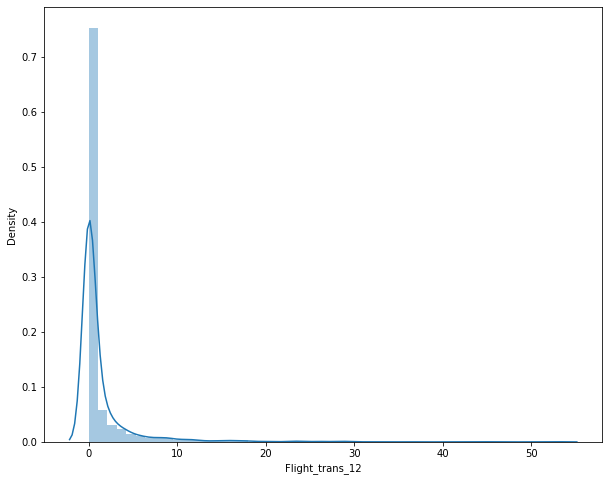

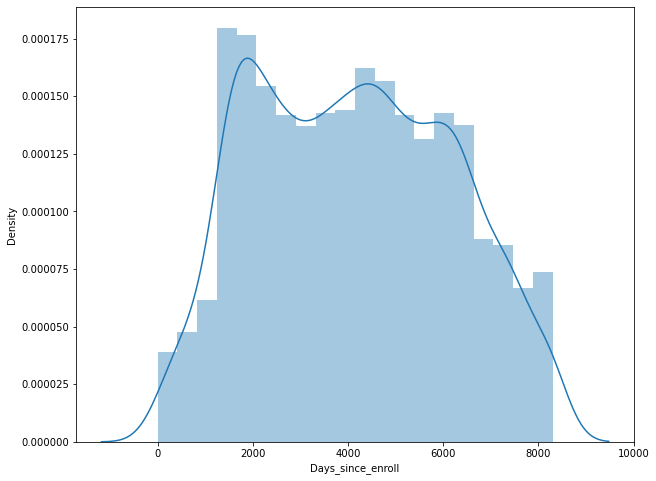

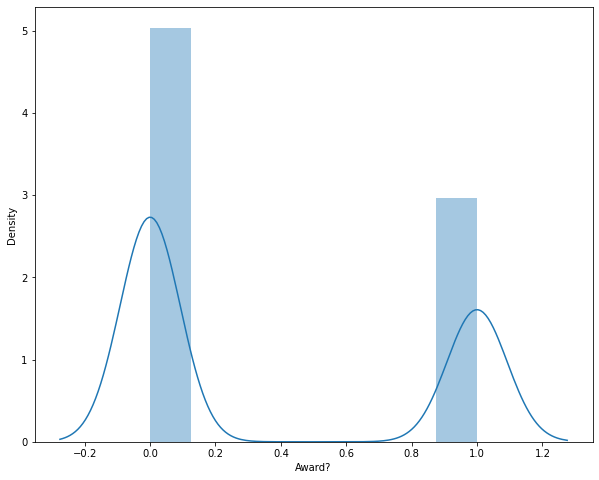

In [12]:
import warnings
warnings.filterwarnings('ignore')

for i in Airline.columns:
    plt.figure(figsize = (10,8))
    sns.distplot(Airline[i])

<AxesSubplot:>

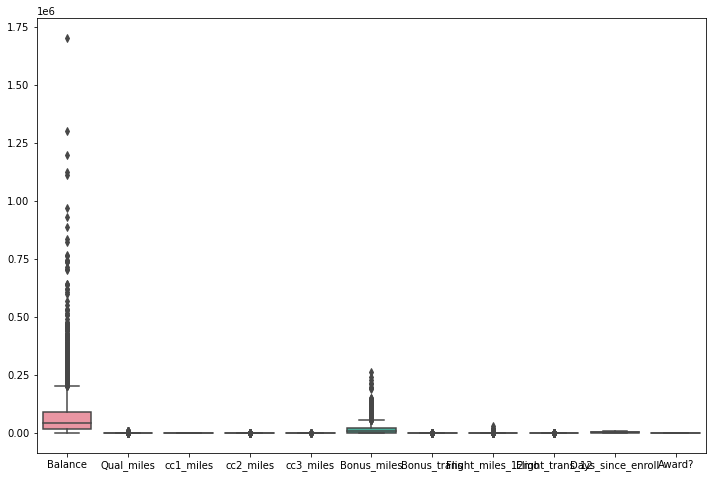

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(data=Airline)

In [14]:
Airline.Balance.value_counts()

1000      10
2000       5
500        5
1500       4
5500       3
          ..
33517      1
25207      1
236274     1
4224       1
28670      1
Name: Balance, Length: 3904, dtype: int64

In [15]:
np.max(Airline.Balance)

1704838

In [16]:
Airline[Airline.Balance == 1704838]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
275,1704838,0,1,1,1,17108,32,4823,23,7283,1


In [17]:
Airline = Airline.drop(Airline.index[275] , axis = 0)

In [18]:
Airline.iloc[270:280]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
270,145726,0,3,1,1,19019,15,0,0,7292,1
271,121639,0,5,1,1,67286,7,0,0,7288,1
272,70676,0,5,1,1,74993,15,0,0,7288,1
273,18263,0,1,1,1,2100,4,1000,2,7285,0
274,51250,0,1,1,1,0,0,0,0,7283,0
276,12895,0,1,1,1,0,0,0,0,7277,0
277,120073,0,3,1,1,12423,29,0,0,7276,1
278,2003,0,1,1,1,980,2,0,0,7274,0
279,22652,0,5,1,1,57642,14,0,0,7271,1
280,168515,0,1,1,1,4600,4,0,0,7269,0


In [19]:
Airline = Airline.reset_index()

In [20]:
Airline.iloc[270:280]

,index,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
270,270,145726,0,3,1,1,19019,15,0,0,7292,1
271,271,121639,0,5,1,1,67286,7,0,0,7288,1
272,272,70676,0,5,1,1,74993,15,0,0,7288,1
273,273,18263,0,1,1,1,2100,4,1000,2,7285,0
274,274,51250,0,1,1,1,0,0,0,0,7283,0
275,276,12895,0,1,1,1,0,0,0,0,7277,0
276,277,120073,0,3,1,1,12423,29,0,0,7276,1
277,278,2003,0,1,1,1,980,2,0,0,7274,0
278,279,22652,0,5,1,1,57642,14,0,0,7271,1
279,280,168515,0,1,1,1,4600,4,0,0,7269,0


In [21]:
Airline.drop('index' , axis =1 , inplace = True)

In [22]:
Airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1
3994,64385,0,1,1,1,981,5,0,0,1395,1
3995,73597,0,3,1,1,25447,8,0,0,1402,1
3996,54899,0,1,1,1,500,1,500,1,1401,0


<AxesSubplot:>

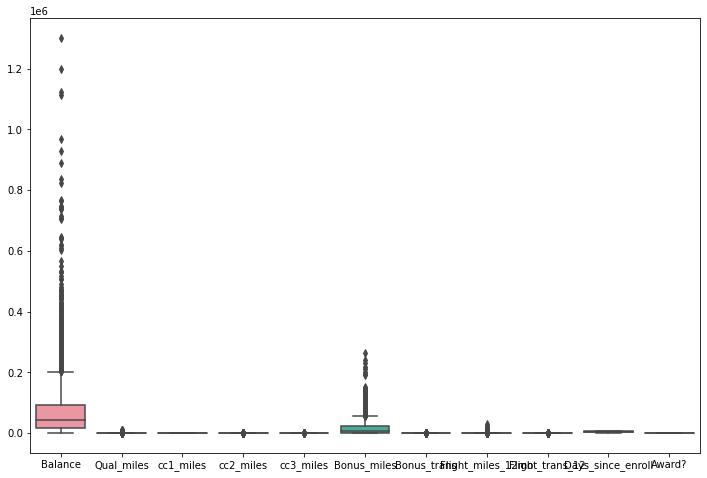

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(data=Airline)

# standardization of data

In [24]:
SC = StandardScaler()

In [25]:
scaled = SC.fit_transform(Airline)

In [26]:
scaled

array([[-0.46244988, -0.18632279, -0.76973166, ..., -0.36217223,
         1.39607323, -0.76666034],
       [-0.55379978, -0.18632279, -0.76973166, ..., -0.36217223,
         1.38057332, -0.76666034],
       [-0.3268365 , -0.18632279, -0.76973166, ..., -0.36217223,
         1.41254189, -0.76666034],
       ...,
       [ 0.00414391, -0.18632279,  0.68289387, ..., -0.36217223,
        -1.31544258,  1.3043586 ],
       [-0.18779455, -0.18632279, -0.76973166, ..., -0.09746207,
        -1.31592695, -0.76666034],
       [-0.72038322, -0.18632279, -0.76973166, ..., -0.36217223,
        -1.31738007, -0.76666034]])

# Agglomerative clustering

In [27]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

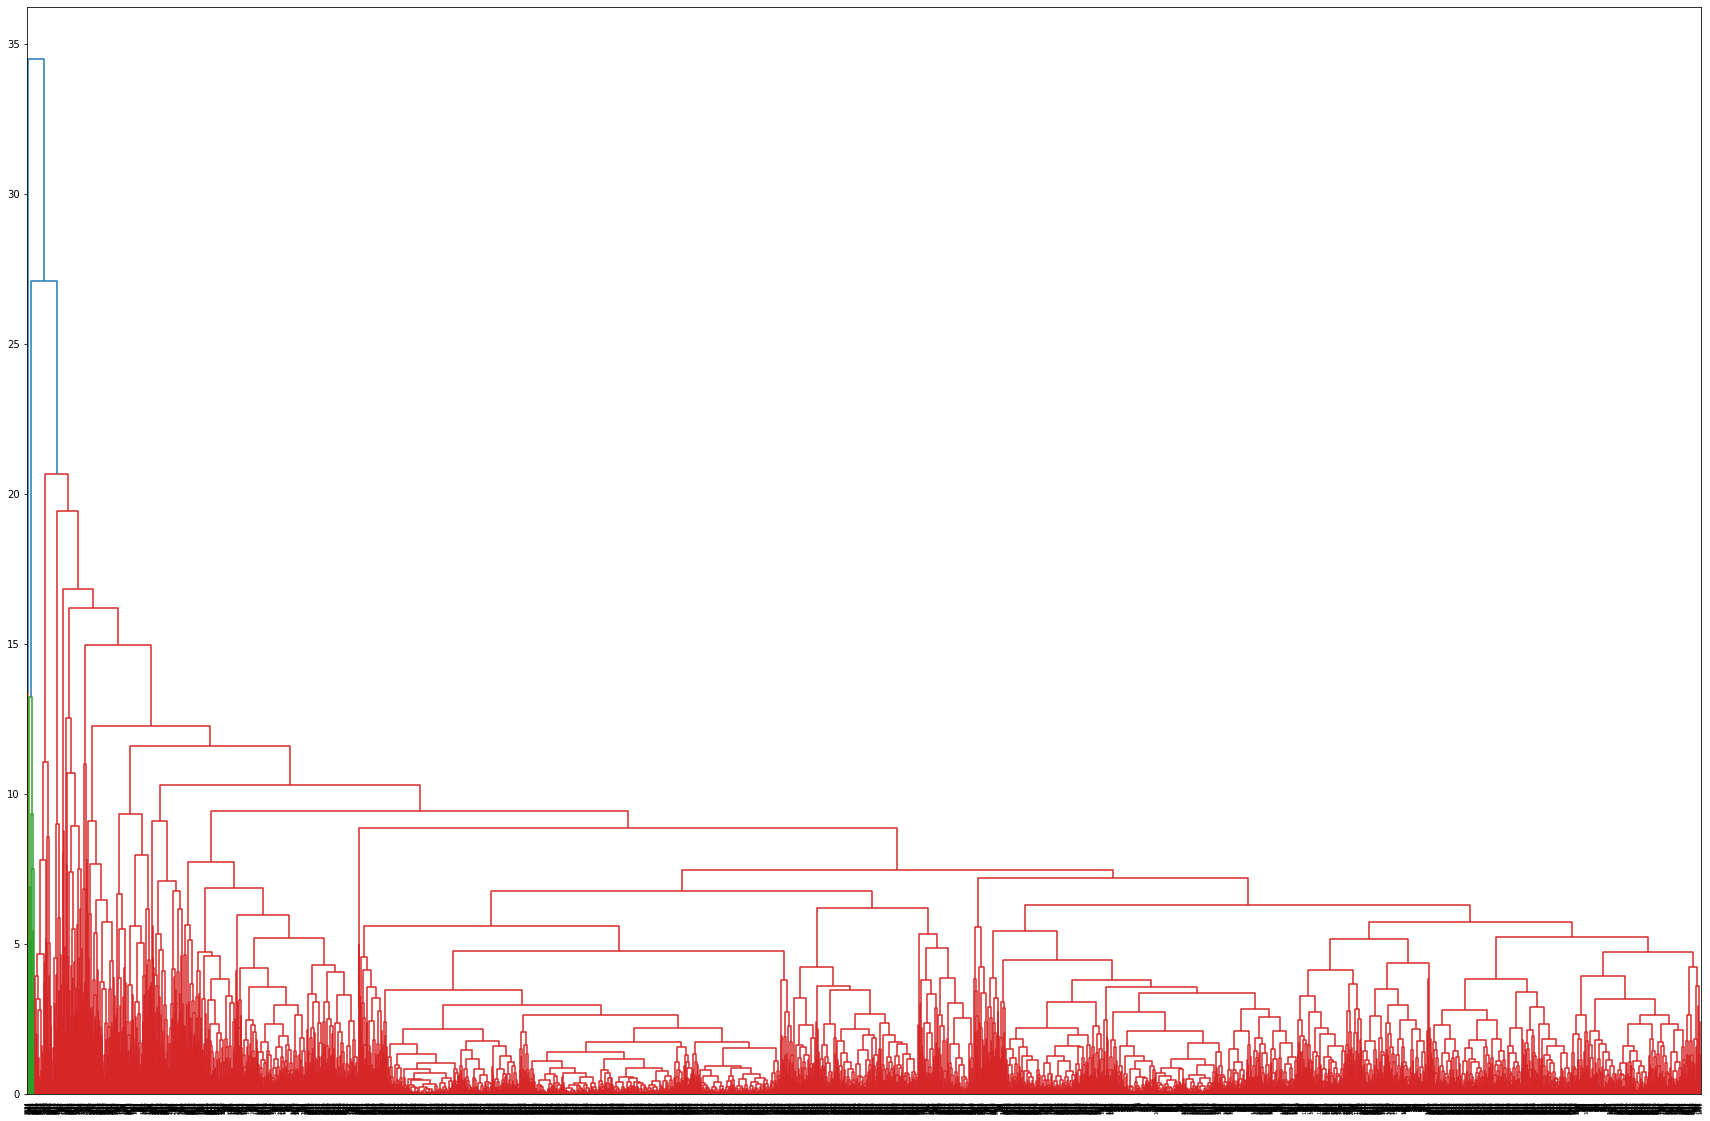

In [28]:
plt.figure(figsize = (30,20))
dendrogram = sch.dendrogram(sch.linkage(scaled, method='complete'))

In [29]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [30]:
hc

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4)

In [31]:
predicted = hc.fit_predict(scaled)

In [32]:
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
hc_lables = hc.labels_
hc_lables

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
score = silhouette_score(scaled,hc_lables)

In [35]:
score

0.6437546173033157

In [36]:
hc1 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [37]:
p1 = hc1.fit_predict(scaled)

In [38]:
l1 = hc1.labels_
l1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
score1 = silhouette_score(scaled,l1)
score1

0.7757860751344239

In [40]:
hc2 = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'complete')

In [41]:
p2 = hc2.fit_predict(scaled)

In [42]:
l2 = hc2.labels_
l2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
score2 = silhouette_score(scaled,l2)
score2

0.811235750906336

In [44]:
# choosing number of clusters as 3 as it gives best score

In [45]:
Agg_clusters = pd.DataFrame( p1, columns = ['Aggclusters'])
Agg_clusters

,Aggclusters
0,0
1,0
2,0
3,0
4,0
...,...
3993,0
3994,0
3995,0
3996,0


In [46]:
Agg_clusters['Aggclusters'].value_counts()

0    3979
2      15
1       4
Name: Aggclusters, dtype: int64

# KMeans Clustering
finding best K value using elbow method

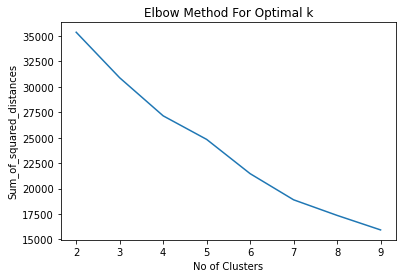

In [47]:
within_cluster_sum_squares = []

for i in range(2,10):
    k_means = KMeans(n_clusters = i , random_state = 42)
    k_means.fit(scaled)
    within_cluster_sum_squares.append(k_means.inertia_)
    
plt.plot(range(2,10) ,within_cluster_sum_squares)
plt.xlabel('No of Clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [48]:
k_means = KMeans(n_clusters = 4, random_state = 42)

In [49]:
pred = k_means.fit_predict(scaled)

In [50]:
pred

array([0, 0, 0, ..., 1, 0, 0])

In [51]:
score = silhouette_score(scaled,pred)
score

0.31071660901817705

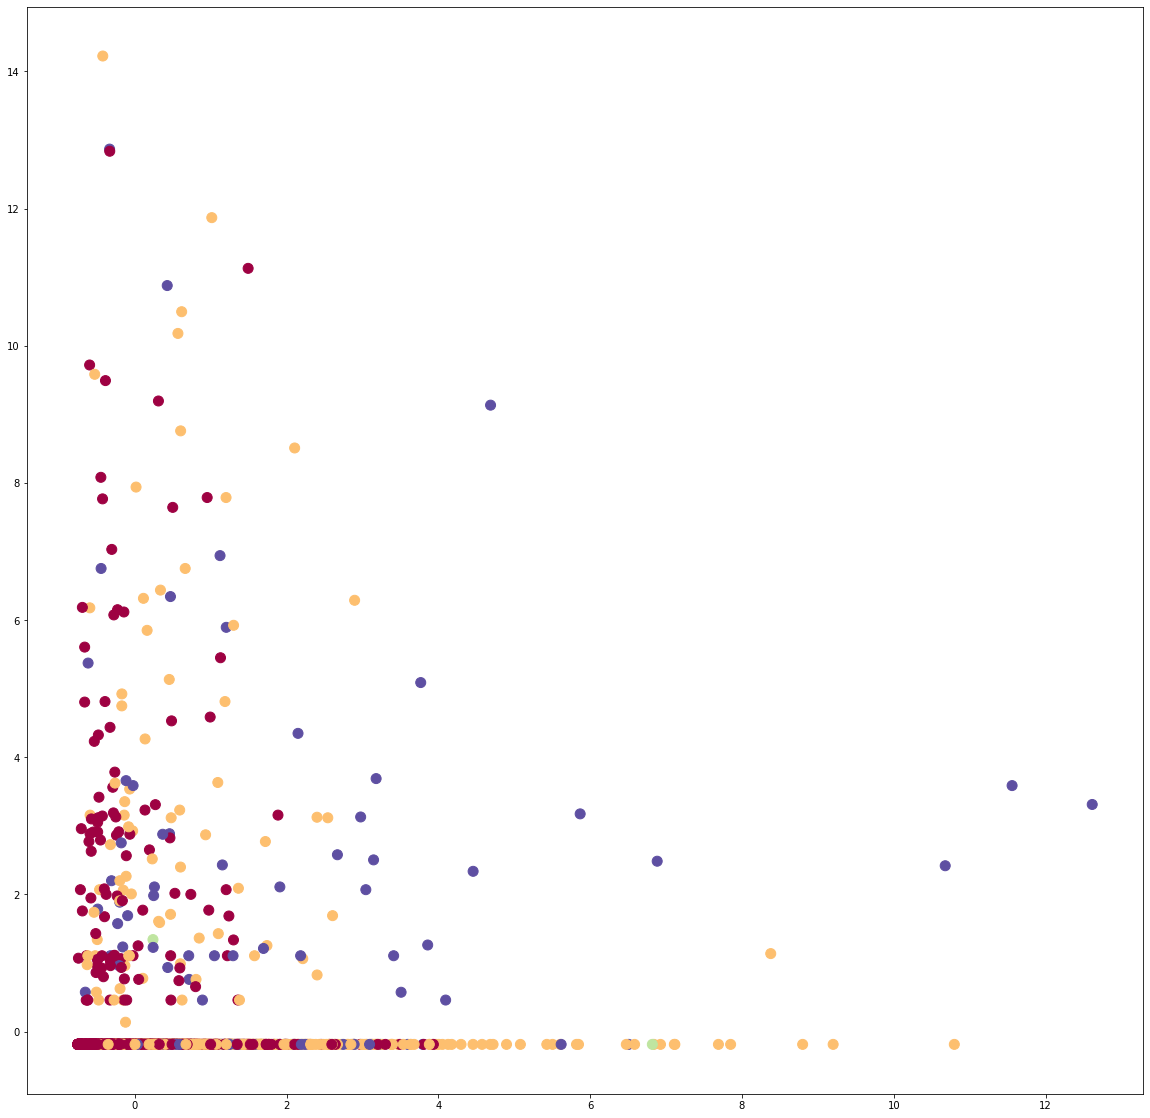

In [52]:
plt.figure(figsize = (20,20))
plt.scatter(scaled[:, 0], scaled[:, 1],c = pred,s=100, cmap='Spectral')

In [53]:
k_clusters = pd.DataFrame(pred , columns = ['kmeans_clusters'])
k_clusters

,kmeans_clusters
0,0
1,0
2,0
3,0
4,1
...,...
3993,0
3994,0
3995,1
3996,0


In [54]:
k_clusters['kmeans_clusters'].value_counts()

0    2558
1    1265
3     160
2      15
Name: kmeans_clusters, dtype: int64

In [56]:
# Checking best silhouette score using number of clusters from a range of 2 to 100

In [57]:
from sklearn.metrics import silhouette_score

In [58]:
Sscore = []
for i in range(2,100):
    kmeans = KMeans(n_clusters=i,random_state=42)
    pred = kmeans.fit_predict(scaled)
    score = silhouette_score(scaled,pred, metric='euclidean')
    Sscore.append(score)

In [59]:
Sscore

[0.3250075398863532,
 0.311921636162051,
 0.31071660901817705,
 0.3350053185917553,
 0.27815227167019124,
 0.2824760790772772,
 0.2820067344776699,
 0.24513805809359632,
 0.2610050469403031,
 0.2677051087020796,
 0.2738983607672689,
 0.27123461738741267,
 0.27241766281205326,
 0.2749225381490722,
 0.2717756765367132,
 0.27115595717925833,
 0.2752017211509584,
 0.2732600696853099,
 0.2720140189298015,
 0.27301782470958713,
 0.25828830968172106,
 0.2741557413415136,
 0.24373997590584348,
 0.24504658260732096,
 0.24886556415170952,
 0.2492699003184261,
 0.24809538929508332,
 0.24639363606108777,
 0.24852630567298872,
 0.24878639847481315,
 0.24837431307356345,
 0.25044565547531494,
 0.2533652626102827,
 0.2538776402734028,
 0.24802934247464167,
 0.24459571030711,
 0.24245165071134506,
 0.24564326094037972,
 0.24879200389348402,
 0.24771832850572126,
 0.2485243738591871,
 0.2485258911802525,
 0.24999941740805925,
 0.24985240931127592,
 0.24967328801678534,
 0.23893116839175688,
 0.22951268

In [60]:
# selecting number of clusters as 2 that gives best silhouette score

In [61]:
kmeans = KMeans(n_clusters=2 ,random_state=42)
pred = kmeans.fit_predict(scaled)
score = silhouette_score(scaled,pred, metric='euclidean')
score

0.3250075398863532

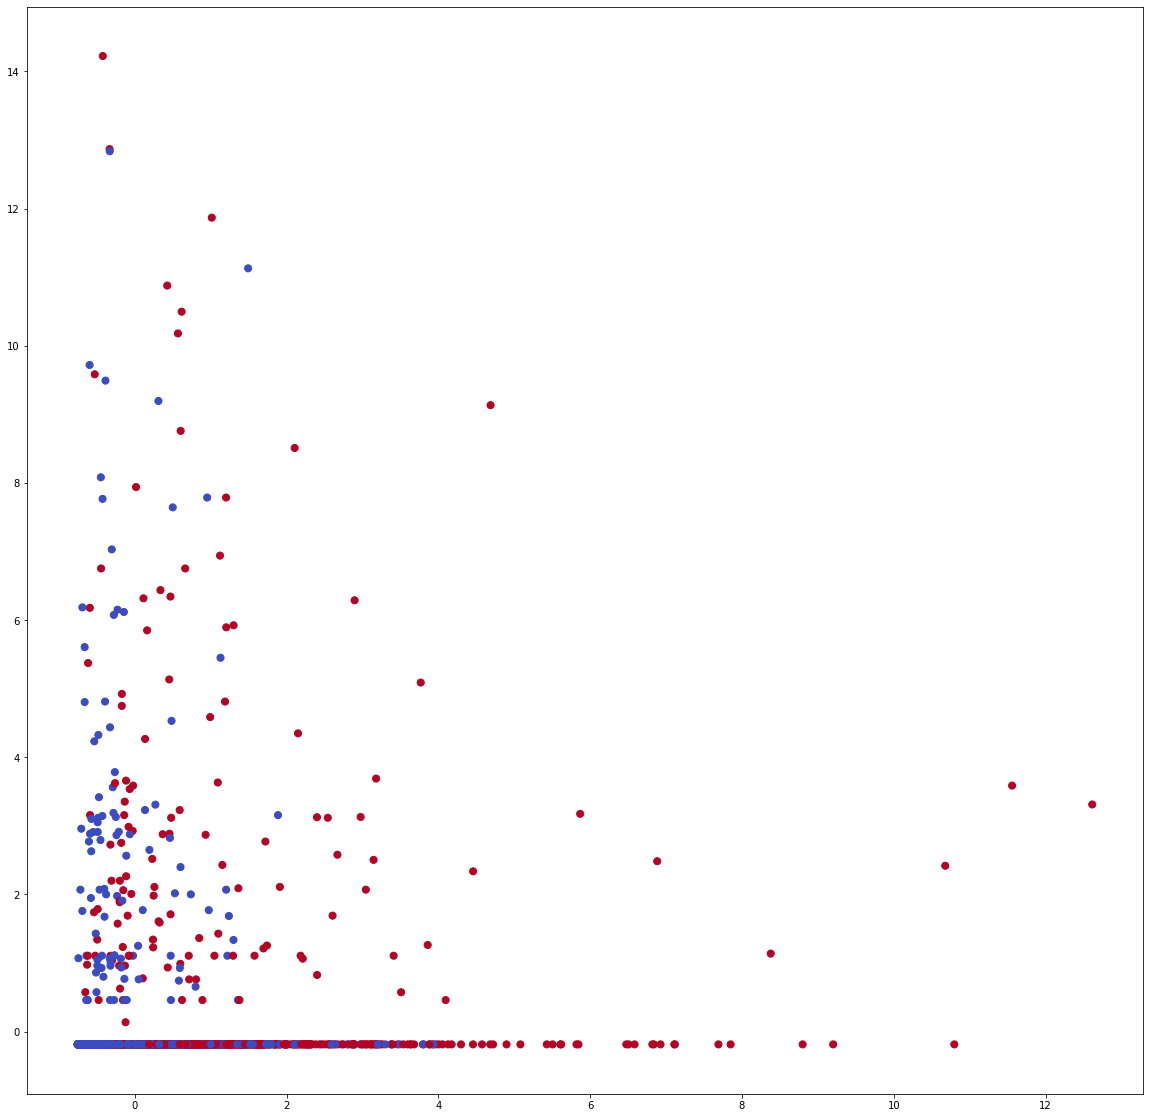

In [62]:
plt.figure(figsize = (20,20))
plt.scatter(scaled[:, 0], scaled[:, 1],c = pred,
            s=50, cmap='coolwarm')

In [63]:
K_clusters = pd.DataFrame(pred , columns = ['KClusters'])
K_clusters

,KClusters
0,0
1,0
2,0
3,0
4,1
...,...
3993,0
3994,0
3995,0
3996,0


In [64]:
K_clusters['KClusters'].value_counts()

0    2696
1    1302
Name: KClusters, dtype: int64

# DBSCAN clustering
# using k distance plot to find best eps value

Text(0, 0.5, 'Distance')

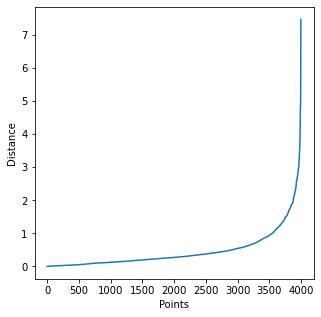

In [65]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(scaled)

distances, indices = neighbors.kneighbors(scaled)
distances = np.sort(distances[:,1], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [66]:
from sklearn.cluster import DBSCAN

In [67]:
dbscan = DBSCAN(eps= 3, min_samples=25)

In [68]:
pred = dbscan.fit_predict(scaled)

In [69]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
DB_clusters=pd.DataFrame(dbscan.labels_ , columns = ['DBclusters'])
DB_clusters

,DBclusters
0,0
1,0
2,0
3,0
4,0
...,...
3993,0
3994,0
3995,0
3996,0


In [72]:
DB_clusters['DBclusters'].value_counts()

 0    3841
-1     157
Name: DBclusters, dtype: int64

In [73]:
silhouette_score(scaled,dbscan.labels_)

0.6594760921472311

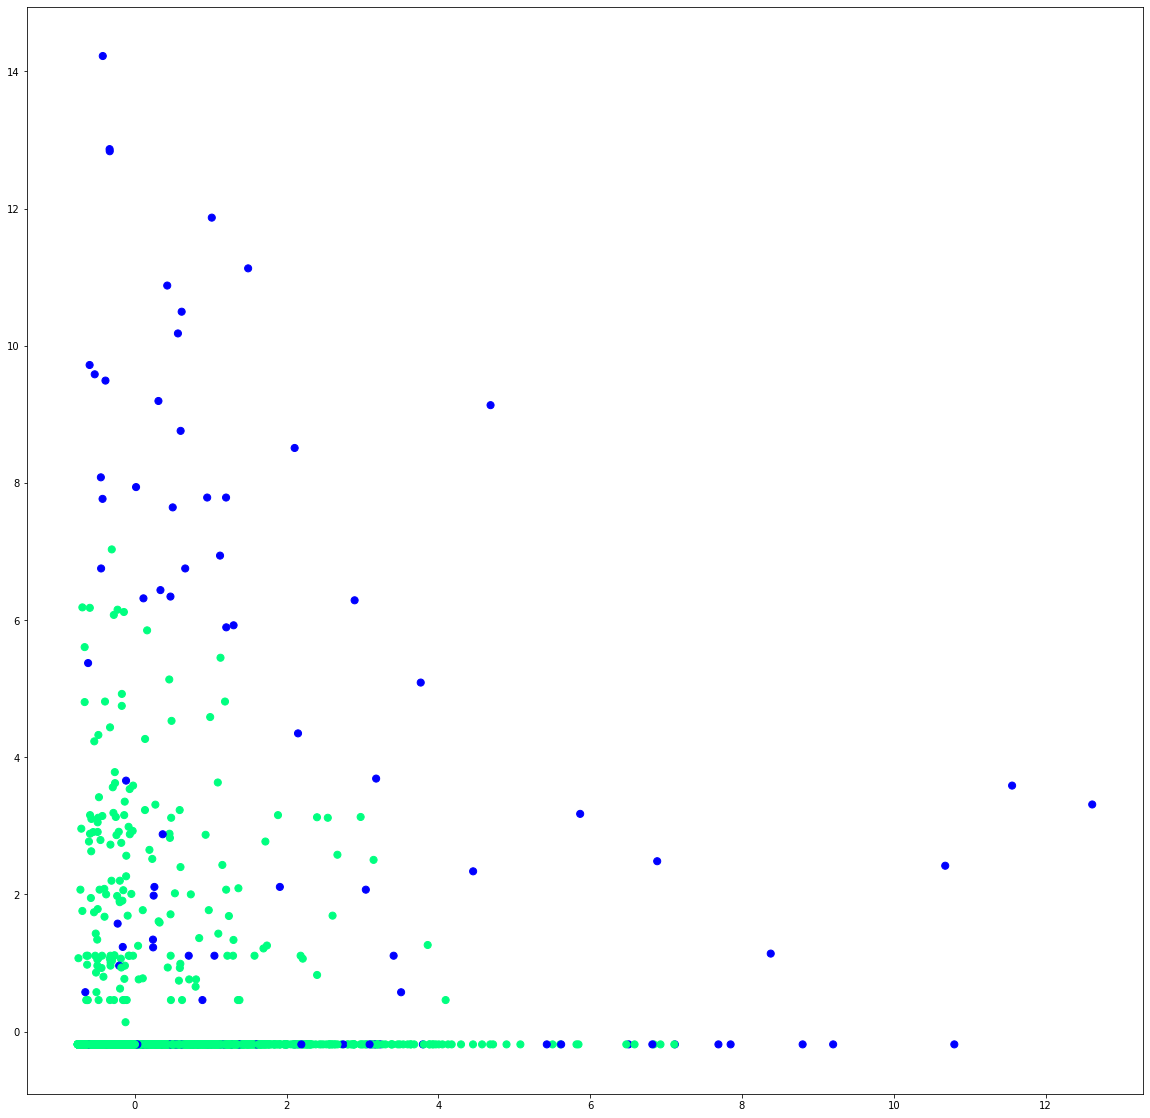

In [74]:
plt.figure(figsize = (20,20))
plt.scatter(scaled[:, 0], scaled[:, 1], c = pred, s=50 ,cmap='winter')

In [75]:
Airline_clusters = pd.concat([Airline,K_clusters,Agg_clusters,DB_clusters] , axis = 1)

In [76]:
Airline_clusters

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KClusters,Aggclusters,DBclusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,0
3994,64385,0,1,1,1,981,5,0,0,1395,1,0,0,0
3995,73597,0,3,1,1,25447,8,0,0,1402,1,0,0,0
3996,54899,0,1,1,1,500,1,500,1,1401,0,0,0,0


In [77]:
# Agglomerative clustering gave a good silhouette score when 3 clusters were considered , 98% of the data went into cluster 1
# KMeans clustering gave a good score  when 4 clusters were formed using elbow plot
# Using DBSCAN clustering , clustered most of the data while only 4% outliers were detected 